# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [2]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE): 
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

Either the file is missing or not readable, download it
--2022-11-23 22:50:50--  https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.github.com (raw.github.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv [following]
--2022-11-23 22:50:51--  https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436 (2.4K) [text/plain]
Saving to: ‘50_Startups.csv’

50_Startups.csv     100%[====

In [3]:
# load the dataset using pandas
data = pd.read_csv('50_Startups.csv')
# extract data feature matrix and labels
X = data.iloc[:,:-2].values
y = data.iloc[:,3].values
df = pd.DataFrame(data)

In [4]:
y

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [5]:
df.shape

(50, 5)

In [6]:
df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


***Select two categories for binary classification*** 

In [7]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [8]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [9]:
df_sel.dtypes # type of each column  

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data*** 

One-hot encoding of categorical feature _State_

In [10]:
df_one = pd.get_dummies(df_sel["State"])

In [11]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [12]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [13]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [14]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


***Classification***

Prepare the dataset:

In [15]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

Train the Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.3333

**COMMENTO**

Il file "50_Startups.csv" contiene, come suggerisce il nome, i dati relativi a 50 aziende distrubuite tra Florida, California e New York. Gli attributi oltre allo stato sono : "R&D Spend", "Administration" , "Marketing Spend" e "Profit".
Il file csv viene letto in python attraverso la funzione "read_csv()" inclusa in "pandas".
Ci si pone l'obiettivo di trovare un modello che predica lo stato dell'azienda sulla base dei 4 attributi riportati prima. Dunque la y del modello sarà proprio lo stato (la penultima colonna del dataset) e la X gli altri quattro attributi.
La funzione "DataFrame(data)" converte i dati letti dal file csv in un Data Frame. 
Dopo la funzione "replace()", già commentata nel codice, si riduce il problema in uno di classificazione binaria: si considerano solo le righe del Data Frame che hanno come stato California oppure Florida. La funzione "get_dummies()" applicata alla colonna dello stato restituisce una One-Hot Encoding. Essendoci solo due stati da valutare, se un'istanza ha valore 1 sotto California, avrà necessariamente 0 sotto Florida. 
In conclusione il Data Frame finale nella colonna "State" contiene un 1 quando l'azienda è in California, 0 quando è in Florida.

 I dati necessitano di essere normalizzati, per cui ogni valore è diviso per il massimo valore assoluto della rispettiva colonna. Ora che i dati sono normalizzati, si ridefiniscono la X e la y del modello tenendo conto delle modifiche apportate. 
Attraverso la libreria "sklearn" prima si divide il dataset in training set e test set e poi si calcolano le predizioni attraverso la Regressione Logistica.

***Plot results***

Confusion Matrix visualization

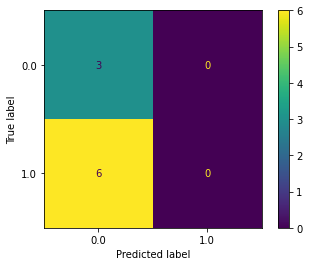

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,LR.predict(X_test),labels=LR.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=LR.classes_)
disp.plot()
plt.show()


**COMMENTO**

Importando da sklearn la Confusion Matrix si può visualizzare in maniera efficace il comportamento del modello rispetto ai valori veri salvati in "y_test". Si sono predette correttamente solo 3 aziende della florida, spiegando così il valore di 0.33 fornito dalla funzione "LR.score()" nella dodicesima cella del notebook (y_test contiene 9 valori, quindi 3/9 = 0.33)

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course). 

In [20]:
import numpy.linalg as LA

def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d 
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

def LogGradient(X,labels,w,points):
    return ((1/points)*(np.transpose(X)@(sigmoidM(X,w)-labels)))

def LogisticLoss(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    return cost


**Lasso Regression**

In [21]:
def LassoLogisticLoss(X,labels,w,lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    
    n = np.shape(X)[0]
    logloss = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    penalty = LA.norm(w,1)
    cost = logloss + (1/n)*lam*penalty
    return cost

def L1_subgradient(z):
    g = np.ones(z.shape)
    g[z < 0.] = -1.0
    return g

def LassoGradient(w, lam,points):
    return (1/points)*lam * L1_subgradient(w) 

def LassoGDLogistic(X, labels, iter, gamma,lam):  #note
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L2 penalty term
    """
    d = np.shape(X)
    cost = np.zeros(iter)
    
   
    #w = np.random.uniform(-1, 1, d[1])
    #Un alternativa è settare in partenza tutti 0:
    w = np.zeros(d[1])
    
    W = np.zeros((d[1],iter))
    for i in range(iter):
        W[:,i] = w
        w = w-gamma*(LogGradient(X,labels,w,d[0]) + LassoGradient(w, lam,d[0]))
        cost[i] = LassoLogisticLoss(X,labels,w,lam)
    return W,cost 

**Ridge Regrssion**

In [22]:
def RidgeLogisticLoss(X,labels,w,lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    
    n = np.shape(X)[0]
    logloss = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    penalty = LA.norm(w,2)
    cost = logloss + (1/n)*lam*penalty
    return cost

def RidgeGradient(w, lam,points):
    return ((1/points)*2*lam*w)

def RidgeGDLogistic(X, labels, iter, gamma,lam):  #note
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L2 penalty term
    """
    d = np.shape(X)
    cost = np.zeros(iter)
    
   
    w = np.random.uniform(-1, 1, d[1])
    #Un alternativa è settare in partenza tutti 0:
    #w = np.zeros(d[1])
    
    W = np.zeros((d[1],iter))
    for i in range(iter):
        W[:,i] = w
        w = w-gamma*(LogGradient(X,labels,w,d[0]) + RidgeGradient(w, lam,d[0]))
        cost[i] = RidgeLogisticLoss(X,labels,w,lam)
    return W,cost 

**Elastic-Net Regression**

In [23]:
def ElasticLogisticLoss(X,labels,w,lam,alpha):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lam : float 
          Weight of the Elastic-Net penalty
    alpha : float
            Weight of L1 penalty 
            
    """
    
    n = np.shape(X)[0]
    logloss = LogisticLoss(X, labels, w)
    penaltyl1 = LA.norm(w,1)/n
    penaltyl2 = LA.norm(w,2)/n
    cost = logloss + lam*(alpha*penaltyl1 +(1-alpha)*penaltyl2)
    return cost

def RidgeGradient(w, lam,points):
    return ((1/points)*2*lam*w)

'''def L1_subgradient(z):
    g = np.ones(z.shape)
    g[z < 0.] = -1.0
    return g

def LassoGradient(w, lam,points):
    return (1/points)*lam * L1_subgradient(w) '''


def ElasticGradient(w, lam,alpha,points):
    return alpha*LassoGradient(w,lam,points)+(1-alpha)*RidgeGradient(w,lam,points)

def ElasticGDLogistic(X, labels, iter, gamma,lam,alpha):  
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the penalty term
    alpha : float
            Weight of L1 penalty 
    """
    d = np.shape(X)
    cost = np.zeros(iter)
    
   
    w = np.random.uniform(-1, 1, d[1])
    #Un alternativa è settare in partenza tutti 0:
    #w = np.zeros(d[1])
    
    W = np.zeros((d[1],iter))
    for i in range(iter):
        W[:,i] = w
        w = w-gamma*(LogGradient(X,labels,w,d[0]) + ElasticGradient(w, lam, alpha, d[0]))
        cost[i] = ElasticLogisticLoss(X,labels,w,lam,alpha)
    return W,cost 

**COMMENTO**

Nel codice sono implementate la Ridge Regression, la Loss Regression e l'Elastic-Net Regression.
Di seguito si commenta solo il codice dell'implementazione dell'Elastic-Net, poi si confronatano i risultati tra tutti e tre i metodi.

ELASTIC-NET
 Dai laboratori precedenti si importano (in questo caso in realtà il codice è stato copiato e incollato) le funzioni "LogisticLoss()", "sigmoidM()" e la "LogGradient()". Queste funzioni costituiscono la "parte non regolarizzata" della Loss e del Gradient Descent. 
A queste funzioni si aggiunge la "ElasticLogisticLoss()". Alla Loss calcolata con la funzione "LogistcLoss()" somma le penalizzazioni L1 e L2 pesate dai valori "lam" e "alpha" (con "alpha" per L1 e (1-"alpha") per l2).
Anche le funzioni "RidgeGradient()", "L1_subgradient()" e "LassoGradient()" sono prese dai precedenti laboratori e servono per la costruzione della funzione "ElasticGradient()". Si tratta di una modifica della funzione già vista nei laboratori "GDLogistic()".

Per fissare il numero di iterazioni e lo step del Gradient Descent è utile plottare il grafico della Loss. Ad esempio con uno step di 0.2 dopo circa 2500/3000 iterazioni la curva sembra appiattirsi, mentre con uno step di 0.5 ne bastano circa 1500/2000. Come fissare il parametro alpha fissato un lambda è invece più difficile. La funzione "classification_report" della libreria sklearn non evidenzia sostanziali differenze al variare di alpha. Sarebbe utile avere più dati a disposizione nel set di test.


***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions. 

In [24]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Repeat the previous task for regularized logistic regression and compare the results. 

**Lasso Regression**

In [25]:
iterations = 6000
gamma = 0.1
#gamma = 0.2


Plot to check if iteration and gamma values are good

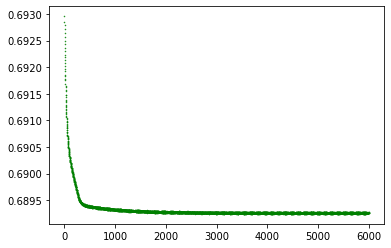

In [26]:
w_prova, c_prova = LassoGDLogistic(X_train,y_train,iterations,gamma,0.4)

fig,ax = plt.subplots()
ax.plot(c_prova,'go',markersize=0.5)
fig.show()

Test to find best lambda

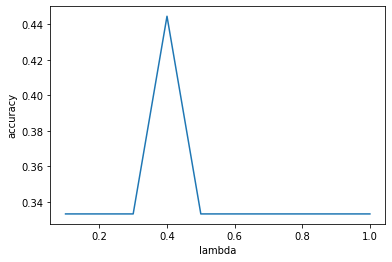

In [27]:
from sklearn.metrics import accuracy_score
lambdas = np.linspace(0.1,1,10)
pred = []
for i in lambdas:
    w_temp,c_temp = LassoGDLogistic(X_train,y_train,iterations,gamma,i)
    pesi = w_temp[:,-1]
    valori = sigmoidM(X_test,pesi)
    pred.append(np.round(valori))
    
acc = []
for i in range(len(lambdas)):
    acc.append(accuracy_score(y_test, pred[i]))

fig, ax = plt.subplots()
ax.plot(lambdas,acc)
plt.xlabel("lambda")
plt.ylabel("accuracy")
plt.show()

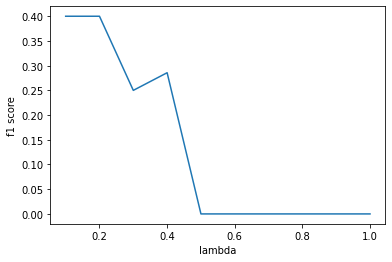

In [28]:
from sklearn.metrics import f1_score
f1_scores = []

for i in range(len(lambdas)):
    temp = f1_score(y_test, pred[i])
    f1_scores.append(temp)

fig, ax = plt.subplots()
ax.plot(lambdas,f1_scores)
plt.xlabel("lambda")
plt.ylabel("f1 score")
plt.show()

Classification Report for lambda = 0.4

In [29]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = np.round(pred[3])
target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



**Ridge Regression**

In [30]:
iterations = 2000
gamma = 0.05

Loss Plot

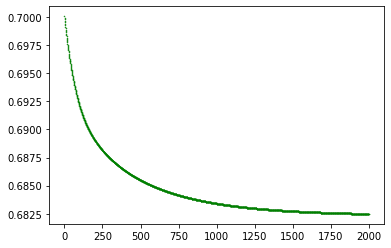

In [31]:
w_prova,c_prova = RidgeGDLogistic(X_train,y_train,iterations,gamma,0.4)
fig, ax = plt.subplots()
ax.plot(c_prova, 'go', markersize=0.5)
fig.show()

Test to find best lambda

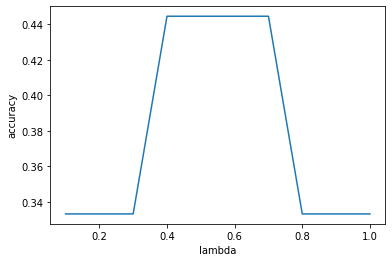

In [32]:
lambdas = np.linspace(0.1,1,10)
pred = []
for i in lambdas:
    w_temp,c_temp = RidgeGDLogistic(X_train,y_train,iterations,gamma,i)
    pesi = w_temp[:,-1]
    valori = sigmoidM(X_test,pesi)
    pred.append(np.round(valori))
    
acc = []
for i in range(len(lambdas)):
    acc.append(accuracy_score(y_test, pred[i]))

fig, ax = plt.subplots()
ax.plot(lambdas,acc)
plt.xlabel("lambda")
plt.ylabel("accuracy")
plt.show()

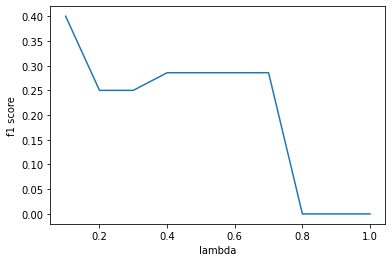

In [33]:
f1_scores = []

for i in range(len(lambdas)):
    temp = f1_score(y_test, pred[i])
    f1_scores.append(temp)

fig, ax = plt.subplots()
ax.plot(lambdas,f1_scores)
plt.xlabel("lambda")
plt.ylabel("f1 score")
plt.show()

Classification Report for lam=0.4

In [34]:
y_true = y_test
y_pred = np.round(pred[3])
target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



**Elastic-Net Regression**

In [35]:
iterations = 2000
gamma = 0.05

Plot Loss

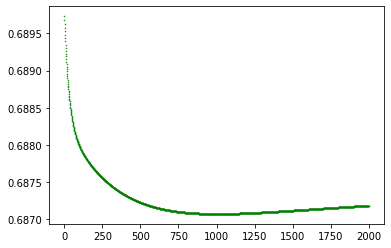

In [36]:
w_prova,c_prova = ElasticGDLogistic(X_train,y_train,iterations,gamma,0.4,0.5)
fig, ax = plt.subplots()
ax.plot(c_prova, 'go', markersize=0.5)
fig.show()


Test for alpha value

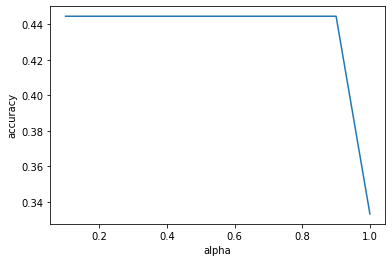

In [37]:
lam = 0.4
alphas = np.linspace(0.1,1,10)
pred = []
for i in lambdas:
    w_temp,c_temp = ElasticGDLogistic(X_train,y_train,iterations,gamma,lam,i)
    pesi = w_temp[:,-1]
    valori = sigmoidM(X_test,pesi)
    pred.append(np.round(valori))
    
acc = []
for i in range(len(alphas)):
    acc.append(accuracy_score(y_test, pred[i]))

fig, ax = plt.subplots()
ax.plot(lambdas,acc)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.show()

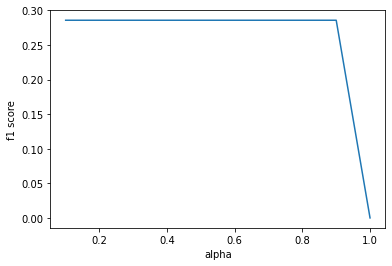

In [38]:
f1_scores = []

for i in range(len(alphas)):
    temp = f1_score(y_test, pred[i])
    f1_scores.append(temp)

fig, ax = plt.subplots()
ax.plot(lambdas,f1_scores)
plt.xlabel("alpha")
plt.ylabel("f1 score")
plt.show()

Classification Report for lambda = 0.4, alpha = 0.5

In [39]:
y_true = y_test
y_pred = np.round(pred[4])
target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



CONFRONTO TRA MODELLI

Occorre chiedersi tra i modelli quale sia il migliore. 
Bisogna comunque rendersi conto che non è facile ottenere risultati veramente soddisfacenti. Il training set conta solo di 24 dati, e con questi dobbiamo prevedere se un'azienda si trova in California o in Florida sulla base di 4 variabili.

LASSO REGRESSION

Importando la funzione "accuracy_score()" sempre da sklearn si può plottare l'accuracy in funzione del peso lambda per valori compresi tra 0 e 1. L'accuracy si mantiene su 0.33 per tutti i valori testati tranne che lam=0.4, dove viene predetta in maniera corretta una etichetta in più. Il fatto che l'accuracy incrementi di 11 punti percentuali non certifica che 0.4 sia il migliore valore per lambda(se ci fossero più dati di test a disposizione questa percentuale probabilmente si ridurrebbe), ma per i dati in possesso sembra una valida scelta. Anche lo score f1 conferma che sia una buona scelta, anche se non la migliore.

Da notare che se si pone gamma = 0.2 anche per lamda = 1 si ottiene un'accuracy di 0.44. Dunque in questo modello anche una piccola variazione nello step-size del Gradient Descent comporta variazioni significative nei risultati.

RIDGE REGRESSION

 I migliori risultati si ottengono per lambda compreso tra 0.4 e 0.7, dove l'accuracy raggiunge 0.44. Anche con "f1_score()" i valori di lambda tra 0.4 e 0.7 si riconfermano buoni, ma questa volta non i migliori: per lambda = 0.1 si raggiunge il valore 0.4. 

Ancora una volta un valore di gamma troppo grande e/o un numero di iterazioni troppo basso restituiscono pesi non corretti e quindi influenzano anche i test sull'accuracy e il Classification Report. In questo caso non essendo il programma molto complesso ci si possono permettere migliaia di iterazioni senza grossi costi computazionali e con un buon livello di precisione grazie ad un gamma di 0.05 .

ELASTIC-NET REGRESSION

In questo caso bisogna fissare due parametri invece che uno solo. L'idea è di fissare lamda = 0.4, che si è dimostrato un buon valore sia per la Lasso che per la Ridge, e far variare alpha. 
Per alpha minore di 0.8 si producono risultati con stessi accuracy e f1 score. Nel Classification Report si prende il valore 0.5.

IN CONCLUSIONE

Tra i modelli considerati non ce n'è uno veramente migliore degli altri. In genere la norma L1 si usa per ridurre il numero di variabili del modello, altrimenti è comunemente implementata la norma L2 (ad esempio in sklearn è implementata di default nella Logistic Regression). L'Elastic-Net è un compromesso tra le due, ma in questo caso non si ottengono risultati migliori. 

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [40]:
def rates(y_true,y_predicted):
    
    if len(y_true) != len(y_predicted):
        raise Exception("y_true and y_predicted have different size")
        
    #tp : true positive
    #fp : false positive
    #p : positive
    #n : negative
    #tpr : true positive rate
    #fpr : false positive rate
    
    
    tp = 0
    fp = 0
    p = 0
    
    for i in range(len(y_true)):
        if y_true[i] == 1:
            p += 1
            if y_predicted[i]==y_true[i]:
                tp +=1
                
        else:
            
            if y_predicted[i]==1:
                fp += 1
                
            
    n = len(y_true)-p

    tpr = tp/p
    fpr  =fp/n
    
    return tpr,fpr

In [41]:
'''
    y: score of the model
    n: numbers of thresholds
    l: lower bound of thresholds
    u: upperbound of thresholds
'''

def threshold_pred(y,n=100000,l=0,u=1):
    threshold = np.linspace(l,u,n)
    results = []
    size = len(y)
    
    for i in threshold:
        y_temp = np.zeros(size)
        for j in range(size):
            if y[j]<i :
                y_temp[j]=0
                
            else :
                y_temp[j]=1
        
        results.append(y_temp)
    return results

In [42]:
'''
    vector : output od threshold_pred
    y_true : array of labels
'''
def tpr_fpr(vector,y_true):
    
    tpr_list = []
    fpr_list=[]
    for i in range(len(vector)):
        tpr,fpr = rates(y_true,vector[i])
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

**ROC function**

In [43]:
def ROC_curve(score,y_true, n = 100000,l = 0,u=1):
    values = threshold_pred(score,n,l,u)
    tpr_list,fpr_list = tpr_fpr(values,y_true)
    plt.plot(fpr_list,tpr_list)

test 

In [44]:
w_test,c_test = LassoGDLogistic(X_train,y_train,5000,0.1,0.5)
pesi_test = w_test[:,-1]
previsioni_test = sigmoidM(X_test,pesi_test)
previsioni_test


array([0.46180279, 0.49322124, 0.4715257 , 0.48053415, 0.44728128,
       0.47467443, 0.47495884, 0.47996252, 0.46293392])

sklearn implementation

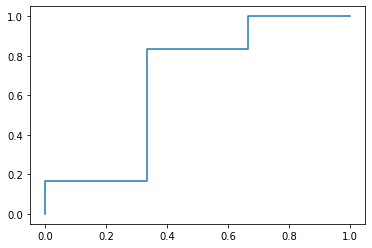

In [45]:
from sklearn import metrics
fpr_sk, tpr_sk, thresholds_sk = metrics.roc_curve(y_true,previsioni_test)
plt.plot(fpr_sk,tpr_sk)

My implementation

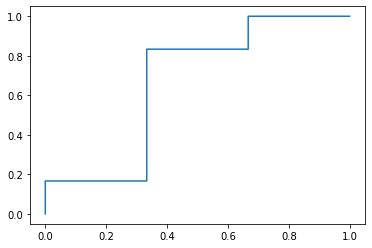

In [46]:
ROC_curve(previsioni_test, y_true)

**COMMENTI**

-rates()

La funzione rates calcola i true positive rates e i false positive rates.
Prende in input il vettore con le etichette e il vettore con i valori predetti.
Vengono inizializzati 3 contatori: tp per i true positive, fp per i false positive e p per i positive.
Si itera un ciclo for sugli elementi del vettore delle etichette "y_true": se l'etichetta è 1 allora si aggiorna il contatore p e , nel caso anche la predizione sia 1 si aggiorna anche il contatore tp; se l'etichetta è falsa e il valore predetto è vero si aggiorna il contatore tp.
Ora si hanno tutti i valori necessari per calcolare il true positive rate e il false positive rate.

-threshold_pred()

La funzione prende in input il vettore y che a sua volta sarà l'output della funzione sigmoide sui pesi calcolati con la regressione logistica (score). Il numero di threshold, il loro lower-bound e upper-bound sono settati di default. Con un n inferiore, ad esempio 1000, potrebbe non venire un grafico corretto. Inoltre se i valori score sono entro un intervallo ristretto conviene settare l e u di conseguenza così da poter ridurre anche n. 
La funzione è molto semplice: itera sui valori che assume il threshold e volta per volta azzera i valori dello score che sono minori e rende 1 quelli che sono maggiori.
Si ottengono come risultato n vettori.

-tpr_fpr()

Prende in input il vettore di n vettori ottenuto con la funzione precedente e le etichette.
Per ciascuno degli n vettori calcola con la funzione "rates()" il true positive rate e il false positive rate.
Ritorna dunque due array : nel primo tutti i true positive rate e nel secondo i false positive rate.

-ROC_curve()

Plotta i valori che si ottengono con la funzione precedente

